# Exercici 1

Agafa el conjunt de dades que vulguis i realitza un pipeline i un gridsearch aplicant l'algorisme de Random Forest.

In [98]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from nltk.tokenize import sent_tokenize
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

In [24]:
#Cargo dataset de Iris
iris = datasets.load_iris()

In [25]:
#Creo dataFrame 
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
#Infromacion del dataset

In [27]:
data.describe()

,sepal length,sepal width,petal length,petal width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [29]:
data.isnull().count()

sepal length    150
sepal width     150
petal length    150
petal width     150
species         150
dtype: int64

In [30]:
#eliminos los valores null
data=data.dropna()

In [31]:
#Separo las columnas en variables independientes y dependiente
X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

In [32]:
#Separo en train y test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7) # 70% training and 30% test

In [33]:
#Pipeline
steps=[('StdSc', StandardScaler()),('RandomForest', RandomForestClassifier(random_state = 7))]
pipeline = Pipeline(steps)


In [34]:
model1 = pipeline .fit(X_train, y_train)
model1.score(X_test,y_test).round(2)


0.87

In [35]:
pipeline.get_params()

{'memory': None,
 'steps': [('StdSc', StandardScaler()),
  ('RandomForest', RandomForestClassifier(random_state=7))],
 'verbose': False,
 'StdSc': StandardScaler(),
 'RandomForest': RandomForestClassifier(random_state=7),
 'StdSc__copy': True,
 'StdSc__with_mean': True,
 'StdSc__with_std': True,
 'RandomForest__bootstrap': True,
 'RandomForest__ccp_alpha': 0.0,
 'RandomForest__class_weight': None,
 'RandomForest__criterion': 'gini',
 'RandomForest__max_depth': None,
 'RandomForest__max_features': 'auto',
 'RandomForest__max_leaf_nodes': None,
 'RandomForest__max_samples': None,
 'RandomForest__min_impurity_decrease': 0.0,
 'RandomForest__min_impurity_split': None,
 'RandomForest__min_samples_leaf': 1,
 'RandomForest__min_samples_split': 2,
 'RandomForest__min_weight_fraction_leaf': 0.0,
 'RandomForest__n_estimators': 100,
 'RandomForest__n_jobs': None,
 'RandomForest__oob_score': False,
 'RandomForest__random_state': 7,
 'RandomForest__verbose': 0,
 'RandomForest__warm_start': False}

In [36]:
#Parametros del Grid
parameters = {'RandomForest__max_depth': [2,5],
                      'RandomForest__criterion'     : ['gini', 'entropy'],
                      'RandomForest__max_features'  : ['auto','sqrt', 'log2'],
                      'RandomForest__n_estimators'  : [50,75]}
grid = GridSearchCV(estimator = pipeline, param_grid = parameters, cv=5, n_jobs= -1)
model2=grid.fit(X_train, y_train)


In [40]:
model2.score(X_test,y_test)

0.9111111111111111

In [43]:
#Despues del tuning el modelo ha mejorado desde 0.87 hasta 0.91

# Exercici 2

Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules

In [122]:
text="""President Joe Biden has encouraged businesses to fix staffing shortages with a simple solution: more money.

“Pay them more,” Mr Biden said in a stage whisper for dramatic effect. “This is an employees’ bargaining chip now.”

“They (businesses) are going to have to compete and pay people a decent wage,” the president continued.

Mr Biden’s statements came during a press conference the president held at the White House on Thursday to address the agreement Democrat and Republican senators reached regarding his infrastructure plan.

Mr Biden was asked his thoughts about businesses coming forward stating they were unable to convince their employees to come back after losing them during the coronavirus pandemic.

Republicans have blamed the federal government’s unemployment benefits amid the pandemic as a reason why workers were not returning to their initial posts.

When speaking about the employee shortage in May, Mr Biden said that the accelerating wage growth in America was a “feature” and not a “bug” of the economy as it moves away from the pandemic.

“When it comes to the economy we’re building, rising wages aren’t a bug, they’re a feature,” he said at the time.

Already several chain businesses like Chipotle have announced an increase to their minimum wage in an effort to entice workers back to the company.

Mr Biden has credited his American Rescue Plan and the Covid-19 vaccination campaign as to why the US economy could be jumping back to normal. But concern has been raised that increased wages could lead to inflation.

The Consumer Price Index, which is a gauge of broad inflation in the country, rose by 0.6 per cent in May. This despite estimations landing the gain at about 0.4 per cent.

The reading was the fastest rate of price growth since 2009, but Mr Biden has assured the public that the numbers being seen now would not likely stay as the economy stabilises."""

In [123]:
tokenized_text=word_tokenize(text)

In [124]:
tokenized_text

['President',
 'Joe',
 'Biden',
 'has',
 'encouraged',
 'businesses',
 'to',
 'fix',
 'staffing',
 'shortages',
 'with',
 'a',
 'simple',
 'solution',
 ':',
 'more',
 'money',
 '.',
 '“',
 'Pay',
 'them',
 'more',
 ',',
 '”',
 'Mr',
 'Biden',
 'said',
 'in',
 'a',
 'stage',
 'whisper',
 'for',
 'dramatic',
 'effect',
 '.',
 '“',
 'This',
 'is',
 'an',
 'employees',
 '’',
 'bargaining',
 'chip',
 'now.',
 '”',
 '“',
 'They',
 '(',
 'businesses',
 ')',
 'are',
 'going',
 'to',
 'have',
 'to',
 'compete',
 'and',
 'pay',
 'people',
 'a',
 'decent',
 'wage',
 ',',
 '”',
 'the',
 'president',
 'continued',
 '.',
 'Mr',
 'Biden',
 '’',
 's',
 'statements',
 'came',
 'during',
 'a',
 'press',
 'conference',
 'the',
 'president',
 'held',
 'at',
 'the',
 'White',
 'House',
 'on',
 'Thursday',
 'to',
 'address',
 'the',
 'agreement',
 'Democrat',
 'and',
 'Republican',
 'senators',
 'reached',
 'regarding',
 'his',
 'infrastructure',
 'plan',
 '.',
 'Mr',
 'Biden',
 'was',
 'asked',
 'his',
 't

In [103]:
fdist = FreqDist(tokenized_text)
print(fdist)


<FreqDist with 201 samples and 364 outcomes>


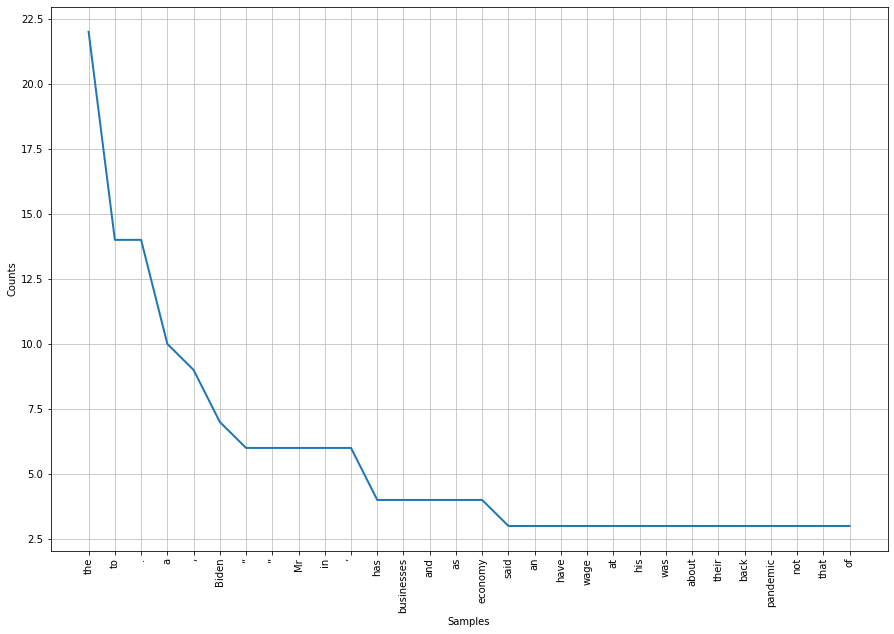

In [114]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
fdist.plot(30,cumulative=False)
plt.show()

In [107]:
#top 5 de palabras
fdist.most_common(5)

[('the', 22), ('to', 14), ('.', 14), ('a', 10), (',', 9)]


# Exercici 1

Treu les stopwords i realitza stemming al teu conjunt de dades.

In [117]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'hadn', 're', 'under', 'during', 'most', 'shan', 'up', 'this', 'now', 'just', 'its', 'be', 'how', 'didn', 'ain', 'no', "shan't", 'of', 'into', 'we', 'there', 's', 'what', 'below', 'with', 'that', "wasn't", 'in', 'further', 'yourself', 'i', 'is', 'do', 'any', 'aren', 'was', 'will', 'couldn', "should've", "you'd", 'so', 'through', 'm', 'had', 'theirs', 'you', 've', "don't", "shouldn't", 'these', 'a', 'some', 'itself', 'but', 'own', 'to', 'him', 'against', 'd', 'mightn', "didn't", 'between', 'they', "hasn't", 'has', "you'll", 'out', 'he', 'very', 't', 'doing', 'or', 'don', 'too', 'me', 'her', "hadn't", "haven't", 'ourselves', 'doesn', 'mustn', 'wasn', 'your', 'both', 'herself', 'hers', 'while', 'who', 'haven', 'yours', 'from', 'o', 'once', "aren't", 'needn', 'above', 'why', 'such', 'each', 'my', 'where', 'should', 'their', "she's", 'at', 'll', 'ours', 'hasn', 'shouldn', 'did', 'if', 'until', 'on', 'here', 'being', 'by', 'she', "couldn't", 'having', "needn't", 'same', 'few', "mustn't", 'b

In [126]:
#Quitamos stopwords
stop_words=set(stopwords.words("english"))
filtered_sent=[]
for w in tokenized_text:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_text)
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ['President', 'Joe', 'Biden', 'has', 'encouraged', 'businesses', 'to', 'fix', 'staffing', 'shortages', 'with', 'a', 'simple', 'solution', ':', 'more', 'money', '.', '“', 'Pay', 'them', 'more', ',', '”', 'Mr', 'Biden', 'said', 'in', 'a', 'stage', 'whisper', 'for', 'dramatic', 'effect', '.', '“', 'This', 'is', 'an', 'employees', '’', 'bargaining', 'chip', 'now.', '”', '“', 'They', '(', 'businesses', ')', 'are', 'going', 'to', 'have', 'to', 'compete', 'and', 'pay', 'people', 'a', 'decent', 'wage', ',', '”', 'the', 'president', 'continued', '.', 'Mr', 'Biden', '’', 's', 'statements', 'came', 'during', 'a', 'press', 'conference', 'the', 'president', 'held', 'at', 'the', 'White', 'House', 'on', 'Thursday', 'to', 'address', 'the', 'agreement', 'Democrat', 'and', 'Republican', 'senators', 'reached', 'regarding', 'his', 'infrastructure', 'plan', '.', 'Mr', 'Biden', 'was', 'asked', 'his', 'thoughts', 'about', 'businesses', 'coming', 'forward', 'stating', 'they', 'were', 'unab

In [127]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['President', 'Joe', 'Biden', 'encouraged', 'businesses', 'fix', 'staffing', 'shortages', 'simple', 'solution', ':', 'money', '.', '“', 'Pay', ',', '”', 'Mr', 'Biden', 'said', 'stage', 'whisper', 'dramatic', 'effect', '.', '“', 'This', 'employees', '’', 'bargaining', 'chip', 'now.', '”', '“', 'They', '(', 'businesses', ')', 'going', 'compete', 'pay', 'people', 'decent', 'wage', ',', '”', 'president', 'continued', '.', 'Mr', 'Biden', '’', 'statements', 'came', 'press', 'conference', 'president', 'held', 'White', 'House', 'Thursday', 'address', 'agreement', 'Democrat', 'Republican', 'senators', 'reached', 'regarding', 'infrastructure', 'plan', '.', 'Mr', 'Biden', 'asked', 'thoughts', 'businesses', 'coming', 'forward', 'stating', 'unable', 'convince', 'employees', 'come', 'back', 'losing', 'coronavirus', 'pandemic', '.', 'Republicans', 'blamed', 'federal', 'government', '’', 'unemployment', 'benefits', 'amid', 'pandemic', 'reason', 'workers', 'returning', 'initial', 'po

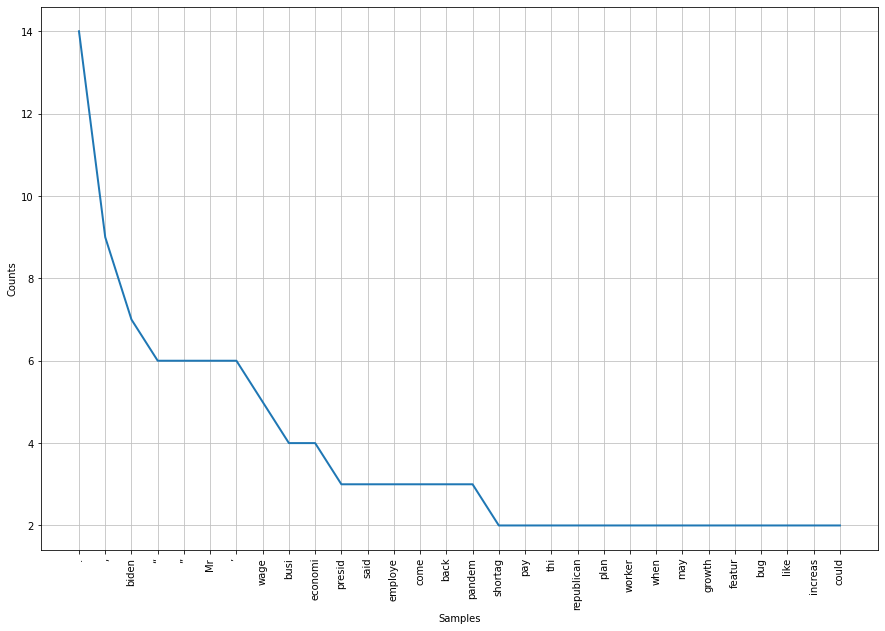

In [138]:
fdist2 = FreqDist(stemmed_words)
# Frequency Distribution Plot
plt.figure(figsize=(15,10))
fdist2.plot(30,cumulative=False)
plt.show()

In [142]:


listfilt = [x for x in stemmed_words if len(x)>2]
print(small)

['presid', 'joe', 'biden', 'encourag', 'busi', 'fix', 'staf', 'shortag', 'simpl', 'solut', 'money', 'pay', 'biden', 'said', 'stage', 'whisper', 'dramat', 'effect', 'thi', 'employe', 'bargain', 'chip', 'now.', 'they', 'busi', 'compet', 'pay', 'peopl', 'decent', 'wage', 'presid', 'continu', 'biden', 'statement', 'came', 'press', 'confer', 'presid', 'held', 'white', 'hous', 'thursday', 'address', 'agreement', 'democrat', 'republican', 'senat', 'reach', 'regard', 'infrastructur', 'plan', 'biden', 'ask', 'thought', 'busi', 'come', 'forward', 'state', 'unabl', 'convinc', 'employe', 'come', 'back', 'lose', 'coronaviru', 'pandem', 'republican', 'blame', 'feder', 'govern', 'unemploy', 'benefit', 'amid', 'pandem', 'reason', 'worker', 'return', 'initi', 'post', 'when', 'speak', 'employe', 'shortag', 'may', 'biden', 'said', 'acceler', 'wage', 'growth', 'america', 'featur', 'bug', 'economi', 'move', 'away', 'pandem', 'when', 'come', 'economi', 'build', 'rise', 'wage', 'bug', 'featur', 'said', 'time

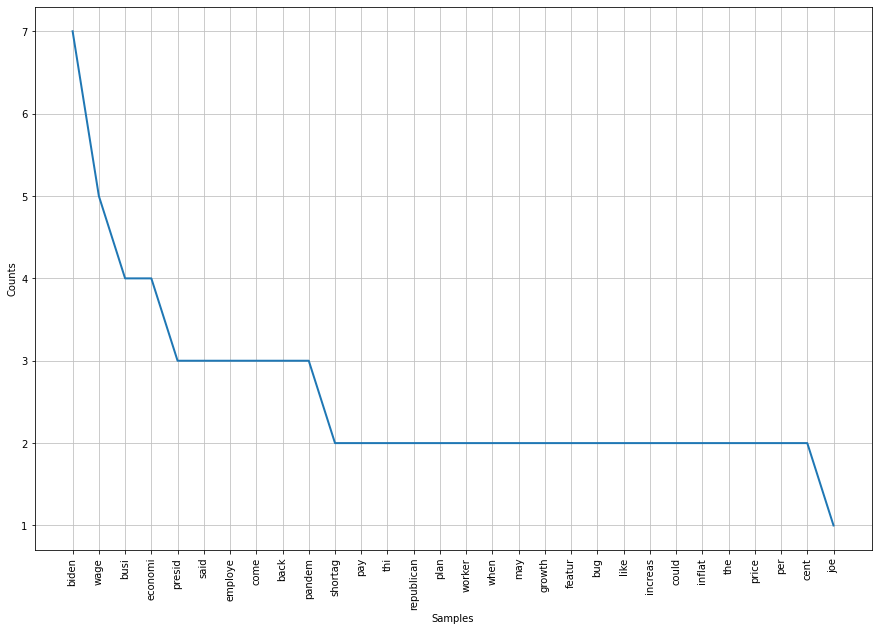

In [143]:
fdist3 = FreqDist(listfilt)
# Frequency Distribution Plot
plt.figure(figsize=(15,10))
fdist3.plot(30,cumulative=False)
plt.show()

# Exercici 1

Realitza sentiment analysis al teu conjunt de dades.

In [128]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [135]:
sia = SentimentIntensityAnalyzer()

In [137]:
sia.polarity_scores(text)

{'neg': 0.03, 'neu': 0.883, 'pos': 0.087, 'compound': 0.9201}

SentimentIntensityAnalyzer() de VADER toma una cadena y devuelve un diccionario de puntuaciones en cada una de las cuatro categorías:

    negativo 0.03
    neutral 0.883
    positivo 0.087
    compuesto (calculado mediante la normalización de las puntuaciones) 
   Segun el clasificador en el texto prevalcece valorcion neutral
   